In [1]:
import torch
import torchaudio
import torchaudio.functional as AF
from pydub import AudioSegment
import torch.nn as nn
import numpy as np
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [2]:
# test = AudioSegment.from_file("./data/test_speech.m4a")
# test.export("./data/test_speech.wav", format="wav")

In [3]:
waveform, rate = torchaudio.load("./data/test_speech.wav")

In [4]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H
print("Sample Rate:", bundle.sample_rate)
print("Labels:", bundle.get_labels())
model = bundle.get_model()

Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [5]:
resamp_waveform = AF.resample(waveform, rate, bundle.sample_rate)

In [6]:
print(resamp_waveform.shape)

torch.Size([1, 99990])


In [7]:
with torch.inference_mode():
    features, _ = model.extract_features(resamp_waveform)

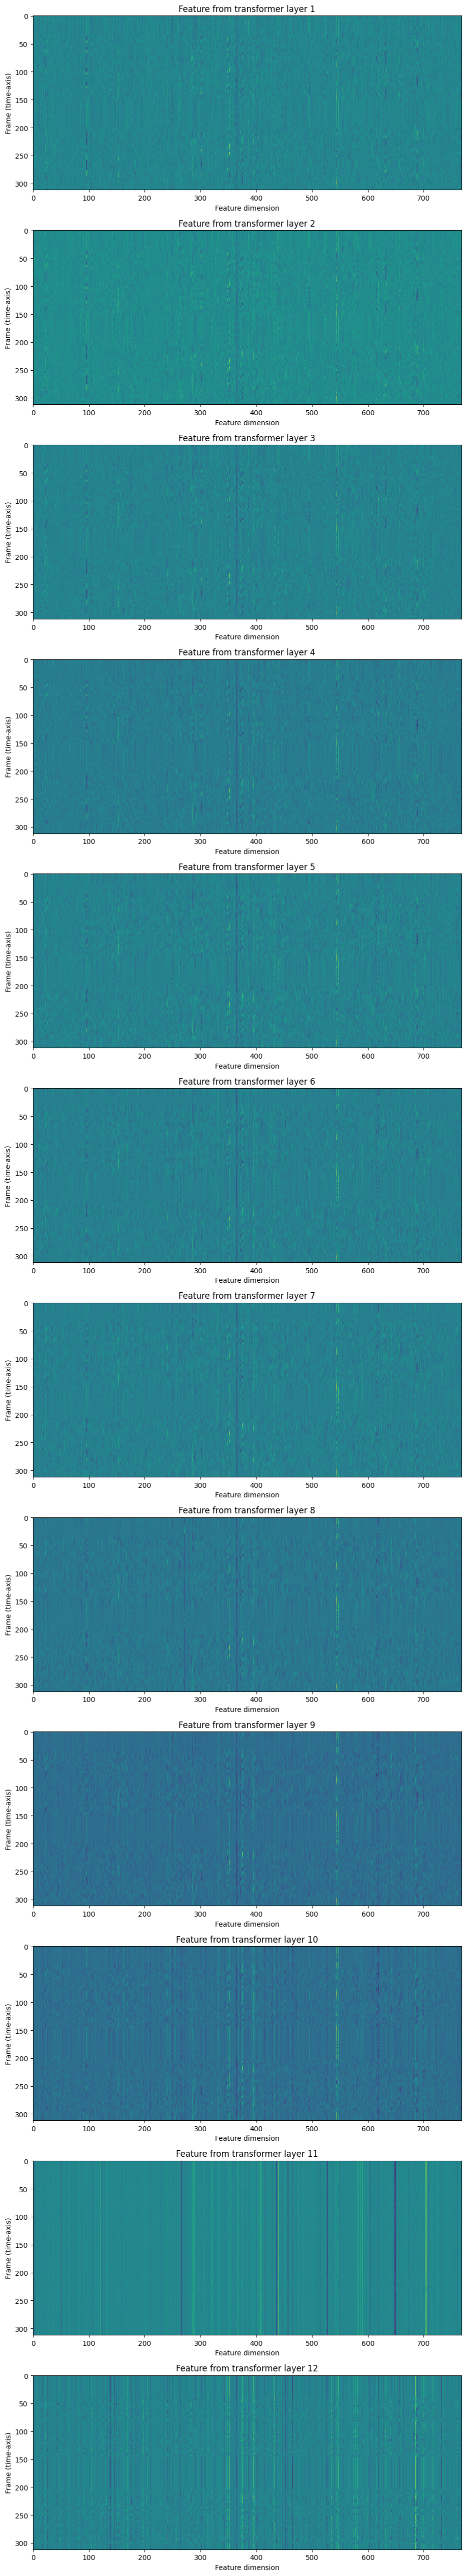

In [8]:
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu())
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [9]:
with torch.inference_mode():

    emissions, _ = model(resamp_waveform)
    

In [10]:
labels = bundle.get_labels()

indices = torch.argmax(emissions[0], dim=-1)  # [num_seq,]
indices = torch.unique_consecutive(indices, dim=-1)
indices = [i for i in indices if i != 0]
out =  "".join([labels[i] for i in indices])

In [11]:
print(out)

RED|LEATHER|YELLOW|LEATHER|THE|NEWS|IS|UNRELIABLE|
